<a href="https://colab.research.google.com/github/JoseEliasDuranRoa/Bio-bio-Coal-mining-municipality-MAP/blob/main/02_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1 Introduction

----
- **Pandas** is a high performance package to work with table-type data structures (like in a spreadsheet).

    + It is used for data analysis and visualization.

- It is built on top of `NumPy` and `MatPlotLib`.
- Documentation <https://pandas.pydata.org/pandas-docs/stable/>
- Quick Start Tutorial <https://pandas.pydata.org/pandas-docs/stable/10min.html>
- Summary of the main functionalities <https://towardsdatascience.com/a-complete-pandas-glossary-for-data-science-a3bdd37febeb>   

<!--
-  (https://dataprep.ai/ collect, EDA, Clean)
-->

---

In [ ]:
# Uncomment to update Pandas
# !pip install pandas -U -q

import pandas as pd
import numpy as np
pd.__version__

'2.1.4'

# 2 Data frames


- Data frames are rectangular data structures where
    + each column is a variable
    + each row is a measument or observation
    
- "Similar" to a 2D Numpy array with names in the rows and columns,
- BUT it can contain *different types of data* with each column

- They can be build manually build it manually from a dictionary or an array, but it will be more often imported from files (text, spreadsheets, etc.).

## DataFrame from a dictionary.



In [ ]:
Name    = np.array(['Juan', 'Pedro', 'Ana', 'Isabel'])
Morning = [True, False, False, True]
Grade   = [8, 5, 9, 5.5]

print(type(Morning))

course_dict = {'Name':Name, 'Grade':Grade, 'Group':Morning}

#pd.DataFrame combines different types of Python objects
course = pd.DataFrame(course_dict, columns=['Name', 'Grade', 'Group'])
print(course)
print(type(course))

<class 'list'>
     Name  Grade  Group
0    Juan    8.0   True
1   Pedro    5.0  False
2     Ana    9.0  False
3  Isabel    5.5   True
<class 'pandas.core.frame.DataFrame'>


- Here it was unnecesary to use the explicit `columns` option since they were taken from the dictionary




- But we may want to give name to the rows

In [ ]:
# Definition of row_labels
row_labels = ['01', '02', '03', '04']

# Specify row labels of course
course.index = row_labels
print(course)

      Name  Grade  Group
01    Juan    8.0   True
02   Pedro    5.0  False
03     Ana    9.0  False
04  Isabel    5.5   True


## Importing data

* Data can be imported with functions `read_csv()`  `read_table()`,`read_excel()`, `read_stata()`, etc.

* Further information on all the functions available and its arguments: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [ ]:
unemployment = pd.read_csv('https://www.dropbox.com/s/r0owh4kjx6zg8f9/country_total.csv?dl=1')
unemployment

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8


# 3 Using data files in Colab


* Your cloud storage for Google Colab can be accessed using a folder icon on the left vertical bar


* NOTE: Google Colab storage is lost when your virtual machine is closed

## 3.1 Data directly uploaded from your local hard drive

* Example:

  + Download [this file](https://www.dropbox.com/scl/fi/09vg6szyjxzkj89oz7n2u/brics.csv?rlkey=v9nlhvvnxht7m4wkzmm20ue7v&st=o9duhoxm&dl=0) as a .csv to your hard drive
  
  + Use the upload icon to have in your Colab folder

  + You can now read it



In [ ]:
# Argumente index_col = 0: use first column as row names, not a column variable
brics = pd.read_csv('/content/brics.csv', index_col = 0)
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


## 3.2 Data downloaded from internet to Colab

* We need to use terminal commands

In [ ]:
# Zipped data in a shared Drobpox folder (or any other internet link)
!wget https://www.dropbox.com/s/g39gepnkfcsdos1/basic_data.zip?dl=1 -O basic_data.zip
!unzip -o basic_data.zip

--2024-09-16 13:11:48--  https://www.dropbox.com/s/g39gepnkfcsdos1/basic_data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/xwridjq0hfi72rjniezgj/basic_data.zip?rlkey=f1oo2u2klroh1skm5hvyk5pha&dl=1 [following]
--2024-09-16 13:11:48--  https://www.dropbox.com/scl/fi/xwridjq0hfi72rjniezgj/basic_data.zip?rlkey=f1oo2u2klroh1skm5hvyk5pha&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d7f159a36fc9e5107f29ff465.dl.dropboxusercontent.com/cd/0/inline/Car0LltJNBWqpXJMcDR8a7ynAdfG4wbF8KdVSOnTmSUjVQt9WdT1Szf7GSCoxWUF7kBfjt3HpCa9IbeWcMXYKzoUoxadfI6WeugALitA8Y4EAIKmBZ7OPSVSWY2YES6GQ_A/file?dl=1# [following]
--2024-09-16 13:11:48--  https://uc7d7f159a36fc9e5107f29ff465.dl.dropboxusercontent.com/cd/0/inl

## 3.3 Mounting Google Drive

* If you click on the "Mount Drive" icon, a code cell with the following code appears

```
   from google.colab import drive
   drive.mount('/content/drive')
```


* Run that cell; you will be asked for an authorization code

* You can now access to your Google Drive files and folders

* Note: if you are familiar on shell commands, you can use the typical commands to list files/subfolders in a folder or to see the content of a text file

In [ ]:
   from google.colab import drive


In [ ]:
   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'
!cat '/content/brics.csv'

MyDrive  Shareddrives
,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.1,143.5
IN,India,New Delhi,3.286,1252
CH,China,Beijing,9.597,1357
SA,South Africa,Pretoria,1.221,52.98

# 4 Some data frames methods

## head()

*  This shows the header (column names) and the first *five* rows

  + you can provide an integer, $n$, to .head() to return that number of rows.

* To see the last $n$ rows, use **.tail()**.



In [ ]:
print(type(brics))

brics.head(n=2)

<class 'pandas.core.frame.DataFrame'>


,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5


* In the left vertical bar, you have also a Variable inspector `{x}` to get visual information about your data.

## shape

* The shape attribute returns the number of rows and colums

* The function `len()` gives only the number of rows.



In [ ]:
brics.shape

(5, 4)

## describe

* It is a useful method to generate various summary statistics

In [ ]:
brics.describe()

,area,population
count,5.000000,5.000000
mean,7.944000,601.176000
std,6.200557,645.261454
min,1.221000,52.980000
25%,3.286000,143.500000
50%,8.516000,200.400000
75%,9.597000,1252.000000
max,17.100000,1357.000000


* Summary statistics are based on non-missing values: note the `count` in the `unemployment` data frame

* We will see that summary statistics depend on the type of data, that is, quantatitive information (numerical variables) or qualitative information (categorical variables)

In [ ]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


#5 Index and select data

## Column access with square brackets

* You can select a column from a dataframe using the **column label(s)** inside square brackets

* **Single** square brackets returns an type of object named Pandas Series: kind of a 1-dimensional array with a label

* **Double** square brackets creates a DataFrame.


In [ ]:
# Print out column as Pandas Series
print(unemployment['unemployment'], type(unemployment['unemployment']))
unemp1 = unemployment['unemployment']


# Print out column as Pandas DataFrame
print(unemployment[['unemployment']], type(unemployment[['unemployment']]))
unemp2 = unemployment[['unemployment']]

# Print out DataFrame several columns
print(unemployment[['month','unemployment']])

0         171000
1         175000
2         166000
3         157000
4         147000
          ...   
20791    2429000
20792    2422000
20793    2429000
20794    2447000
20795    2455000
Name: unemployment, Length: 20796, dtype: int64 <class 'pandas.core.series.Series'>
       unemployment
0            171000
1            175000
2            166000
3            157000
4            147000
...             ...
20791       2429000
20792       2422000
20793       2429000
20794       2447000
20795       2455000

[20796 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>
         month  unemployment
0      1993.01        171000
1      1993.02        175000
2      1993.03        166000
3      1993.04        157000
4      1993.05        147000
...        ...           ...
20791  2010.06       2429000
20792  2010.07       2422000
20793  2010.08       2429000
20794  2010.09       2447000
20795  2010.10       2455000

[20796 rows x 2 columns]


In [ ]:
unem1 = unemployment['unemployment']
unem2 = unemployment[['unemployment']]

print(type(unem1))
print(type(unem2))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## Row access with square brackets

* You can  get rows, or observations, from a DataFrame by using **integer index(es)** and/or **slicing** inside square brackets

* The result is another DataFrame containing only the rows you specified.

* Note: you must use integers, *not* row labels

* Remember: the index starts at zero and the end of the slice is exclusive

In [ ]:
# Print out first 3 observations
print(unemployment[0:3])

# Print out fourth, fifth and sixth observation
print(unemployment[3:6])

  country seasonality    month  unemployment  unemployment_rate
0      at         nsa  1993.01        171000                4.5
1      at         nsa  1993.02        175000                4.6
2      at         nsa  1993.03        166000                4.4
  country seasonality    month  unemployment  unemployment_rate
3      at         nsa  1993.04        157000                4.1
4      at         nsa  1993.05        147000                3.9
5      at         nsa  1993.06        134000                3.5


* You can slice both *contiguous* rows (by index number) and columns (by column name)

In [ ]:
unemployment[0:1][['month','unemployment']]

# print(type(unemployment[0:1][['unemployment']]))
# print(type(unemployment['unemployment'][0:1]))

,month,unemployment
0,1993.01,171000


## `loc()` and `iloc()`

* Any data selection operation on DataFrames can be done with `loc` and `iloc`

* `loc` is label-based, for both rows and columns based on their row and column labels

* `iloc` is based on integer index

In [ ]:
print(brics)

# Print out observation for China
print(brics.loc['CH'])   # label based
print(brics.iloc[3])

# Print out observations for Brasil and South Africa
print(brics.iloc[[1,-1]]) # integer index based

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98
country         China
capital       Beijing
area            9.597
population     1357.0
Name: CH, dtype: object
country         China
capital       Beijing
area            9.597
population     1357.0
Name: CH, dtype: object
         country   capital    area  population
RU        Russia    Moscow  17.100      143.50
SA  South Africa  Pretoria   1.221       52.98


In [ ]:
print(brics)
# Print out population value of Russia
print(brics.loc['RU','population'])
print(brics.iloc[1,3])

# Print sub-DataFrame
print(brics.iloc[[1, 3],[2,3]])
print(brics.loc[['RU','CH'],['area', 'population']])

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98
143.5
143.5
      area  population
RU  17.100       143.5
CH   9.597      1357.0
      area  population
RU  17.100       143.5
CH   9.597      1357.0


In [ ]:
# Print out population column as Series
print(brics.loc[:, 'population'])

# Print out drives_right column as DataFrame
print(brics[['population']])

# Print out cars_per_cap and drives_right as DataFrame
print(brics[['population','area']])

BR     200.40
RU     143.50
IN    1252.00
CH    1357.00
SA      52.98
Name: population, dtype: float64
    population
BR      200.40
RU      143.50
IN     1252.00
CH     1357.00
SA       52.98
    population    area
BR      200.40   8.516
RU      143.50  17.100
IN     1252.00   3.286
CH     1357.00   9.597
SA       52.98   1.221


# 6 Manipulating Columns

## Rename

* The .rename() method allows you to modify index labels and/or column names.

* You pass a dictionary: the original name as the key and the new name as the value.

* Also set the `inplace` parameter to `True`, which modifies the DataFrame, not a copy of it.


In [ ]:
print(unemployment.head())
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)
print(unemployment.head())

  country seasonality    month  unemployment  unemployment_rate
0      at         nsa  1993.01        171000                4.5
1      at         nsa  1993.02        175000                4.6
2      at         nsa  1993.03        166000                4.4
3      at         nsa  1993.04        157000                4.1
4      at         nsa  1993.05        147000                3.9
  country seasonality  year_month  unemployment  unemployment_rate
0      at         nsa     1993.01        171000                4.5
1      at         nsa     1993.02        175000                4.6
2      at         nsa     1993.03        166000                4.4
3      at         nsa     1993.04        157000                4.1
4      at         nsa     1993.05        147000                3.9


## Create

* Writing the name of the data frame followed by the name of the new column within square brackets adds a new variable/column

* For example, you can get the year from the year_month variable by converting it from float64 to an integer

* For more information on pandas dtypes, check the documentation [here.](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes)


In [ ]:
#import math
#unemployment['log_unemployment'] = math.log(unemployment['unemployment'])
unemployment['log_unemployment'] = np.log(unemployment['unemployment'])

unemployment['year'] = unemployment['year_month'].astype(int)

unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)

unemployment.head(12)

,country,seasonality,year_month,unemployment,unemployment_rate,log_unemployment,year,month
0,at,nsa,1993.01,171000,4.5,12.049419,1993,1
1,at,nsa,1993.02,175000,4.6,12.072541,1993,2
2,at,nsa,1993.03,166000,4.4,12.019743,1993,3
3,at,nsa,1993.04,157000,4.1,11.964001,1993,4
4,at,nsa,1993.05,147000,3.9,11.898188,1993,5
5,at,nsa,1993.06,134000,3.5,11.805595,1993,6
6,at,nsa,1993.07,128000,3.4,11.759786,1993,7
7,at,nsa,1993.08,130000,3.4,11.775290,1993,8
8,at,nsa,1993.09,132000,3.5,11.790557,1993,9
9,at,nsa,1993.10,141000,3.7,11.856515,1993,10


## Reorder

* Use bracket notation passing in a list of column names in the desired order


In [ ]:
unemployment = unemployment[['country', 'seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]

unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9


#7 Merging

* Joining data frames allows to combine two sources of information

* For example, you need the name of the country for each country code above.

In [ ]:
countries_url = 'https://www.dropbox.com/s/mqym60yymir28ro/countries.csv?dl=1'
countries = pd.read_csv(countries_url)

countries.head()


,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682



* Select the relevant information

* Use `merge()` function to join the two DataFrames on country code.



In [ ]:
country_names = countries[['country', 'country_group', 'name_en']]
print(unemployment.shape, country_names.shape)


unemployment = pd.merge(unemployment, country_names, on='country')
unemployment.head()

(20796, 7) (30, 3)


,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


* To merge on multiple columns, you can pass a list of column names to the on parameter.

  `pd.merge(first, second, on=['name', 'id'])`

* Sometimes columns have different names:  you need to use the `left_on` and `right_on` parameters, for the variables in the first and in the second dataframes (respectively)

  `pd.merge(one, two, left_on='city', right_on='city_name')`

* For more information on merging, check [the documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

* pandas also provides a .merge() method that can act on a DataFrame; more information [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).


# 8 Unique Values



* The **Series** object includes a .unique() method.




In [ ]:
unemployment.head()

unemployment['name_en'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

* To get a count of the number of unique values, you can use the `Series.nunique()` method

  + you could also use `len()` to get the number of items in the array, or we



In [ ]:
unemployment['name_en'].nunique()

30

* A method called .value_counts() returns the counts for the unique values in the Series, that is, a frequency table


In [ ]:
unemployment['name_en'].value_counts()

,count
name_en,
France,1008
Sweden,1008
Portugal,1008
Netherlands,1008
Luxembourg,1008
Denmark,1008
Belgium,1008
Spain,1008
Ireland,1008


* It can be sorted by index-label name with `.sort_index()` method.


In [ ]:
unemployment['name_en'].value_counts().sort_index()

,count
name_en,
Austria,648
Belgium,1008
Bulgaria,576
Croatia,324
Cyprus,396
Czech Republic,468
Denmark,1008
Estonia,387
Finland,828


# 9 Data Analysis

## A few statistical functions

<hr>
<center>
<table >
   <tr>
     <th>Function</th>
     <th>Description</th>
  </tr>
  <tr>
    <td>max(); min()</td>
    <td>Calculates the maximum or the minimum<td></td>
  </tr>
  <tr>
    <td>mean(); std()</td>
    <td>Calculates the means and the standard deviation<td>
    </td>
  </tr>
  <tr>
    <td>median()</td>
    <td>Calculates the medians<td>
    </td>
  </tr>
  <tr>
    <td>count()</td>
    <td>Count non-missing values<td>
    </td>
  </tr>
  <tr>
    <td>skew(); kurt()</td>
    <td>Calculates the skewness and the kurtosis
    <td>
    </td>
  </tr>
    <tr>
    <td>corr(); var(); cov()</td>
    <td>Calculates correlation, variance and covariance.<td>
    </td>
  </tr>
  </table>
  </center>
  <hr>

* The axis parameter can be passed to these functions

* `axis=0` to obtain a result by columns (default)
* `axis=1` to obtain it by rows.

In [ ]:
# Data on course grades
data = pd.read_csv('https://www.dropbox.com/s/7h4710rz3s5g6mz/asignatura2.csv?dl=1')
data.head()

,Curso,Género,Grupo,P1,P2,P3,P4
0,2013,Femenino,Mañana,8.5,8.3,7.0,8.0
1,2013,Femenino,Mañana,10.0,9.8,8.0,8.8
2,2013,Masculino,Mañana,5.0,10.0,7.4,8.4
3,2013,Femenino,Mañana,7.5,9.2,8.6,8.3
4,2013,Masculino,Mañana,7.0,7.5,7.0,7.7


In [ ]:
# Mean by columns
data[['P1','P2','P3','P4']].mean().round(1)


,0
P1,8.8
P2,8.5
P3,8.6
P4,7.8


In [ ]:

# Mean by rows
data[['P1','P2','P3','P4']].mean(axis=1).round(1).head()



,0
0,8.0
1,9.2
2,7.7
3,8.4
4,7.3


In [ ]:
# Skewness
data[['P1','P2','P3','P4']].skew().round(1)

,0
P1,-1.5
P2,-1.5
P3,-1.4
P4,-1.4


array([[<Axes: title={'center': 'P1'}>, <Axes: title={'center': 'P2'}>],
       [<Axes: title={'center': 'P3'}>, <Axes: title={'center': 'P4'}>]],
      dtype=object)

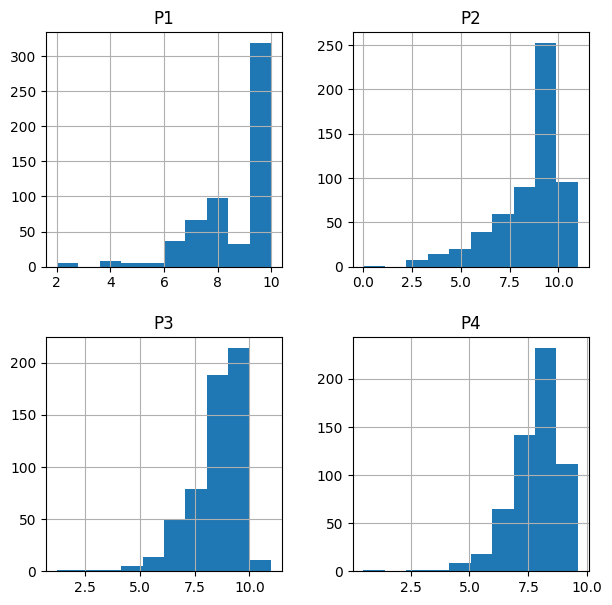

In [ ]:
# Histogram
data[['P1','P2','P3','P4']].hist(figsize=(7,7))

In [ ]:
correlation = data[['P1','P2','P3','P4']].corr().round(2)
correlation

,P1,P2,P3,P4
P1,1.00,0.11,0.19,0.41
P2,0.11,1.00,0.18,0.52
P3,0.19,0.18,1.00,0.49
P4,0.41,0.52,0.49,1.00


In [ ]:
# Non-missing values
data.count()


,0
Curso,599
Género,599
Grupo,599
P1,574
P2,577
P3,564
P4,580


In [ ]:

# Missing values
data.isnull().sum()

,0
Curso,0
Género,0
Grupo,0
P1,25
P2,22
P3,35
P4,19


## How to deal with missing values

* Let's see observation with missing values by filtering rows using a condition

In [ ]:
data[data.isnull().any(axis=1)]

,Curso,Género,Grupo,P1,P2,P3,P4
18,2013,Masculino,Mañana,7.0,4.0,NaN,3.2
65,2013,Masculino,Mañana,5.7,NaN,NaN,0.5
67,2013,Masculino,Mañana,NaN,7.8,6.0,6.4
92,2013,Masculino,Mañana,NaN,7.8,6.8,5.6
101,2013,Femenino,Mañana,NaN,NaN,NaN,NaN
114,2013,Masculino,Tarde,NaN,NaN,NaN,NaN
129,2013,Femenino,Tarde,NaN,NaN,NaN,NaN
131,2013,Masculino,Tarde,NaN,NaN,NaN,NaN
143,2013,Femenino,Tarde,4.0,6.5,NaN,5.5
145,2013,Femenino,Tarde,NaN,NaN,NaN,NaN


### Solution?

* Drop observations with missing values in at least one variable or in all the relevant variables

* Imputation

* Both "solutions" may hide/disregard an important problem in empirical Economics: **sample selection**

In [ ]:
# new data frame without missing
data.dropna(axis=0)

,Curso,Género,Grupo,P1,P2,P3,P4
0,2013,Femenino,Mañana,8.5,8.3,7.0,8.0
1,2013,Femenino,Mañana,10.0,9.8,8.0,8.8
2,2013,Masculino,Mañana,5.0,10.0,7.4,8.4
3,2013,Femenino,Mañana,7.5,9.2,8.6,8.3
4,2013,Masculino,Mañana,7.0,7.5,7.0,7.7
...,...,...,...,...,...,...,...
594,2015,Femenino,Tarde,10.0,10.0,6.2,7.6
595,2015,Masculino,Tarde,10.0,3.0,9.2,7.1
596,2015,Femenino,Tarde,10.0,7.1,7.9,7.4
597,2015,Femenino,Tarde,10.0,10.0,9.9,8.1


In [ ]:
# Imputation with mean
data[['P1','P2','P3','P4']].fillna(data[['P1','P2','P3','P4']].mean())

,P1,P2,P3,P4
0,8.5,8.3,7.0,8.0
1,10.0,9.8,8.0,8.8
2,5.0,10.0,7.4,8.4
3,7.5,9.2,8.6,8.3
4,7.0,7.5,7.0,7.7
...,...,...,...,...
594,10.0,10.0,6.2,7.6
595,10.0,3.0,9.2,7.1
596,10.0,7.1,7.9,7.4
597,10.0,10.0,9.9,8.1


In [ ]:
# Missing in this case most likely means 0
data_filtered = data.fillna(0)
data_filtered.isnull().sum()

,0
Curso,0
Género,0
Grupo,0
P1,0
P2,0
P3,0
P4,0


## Categorical Variables


* Function `map` change the labels of categories in variables with qualitative information

* You can use a dictionary with key and value as the original and the new values, respectively.

In [ ]:
print(data_filtered.head())

data_filtered['Género'].map({'Masculino':1, 'Femenino':2}).head()

data_filtered['Grupo'].map({"Mañana":1, "Tarde": 2}).head()

   Curso     Género   Grupo    P1    P2   P3   P4
0   2013   Femenino  Mañana   8.5   8.3  7.0  8.0
1   2013   Femenino  Mañana  10.0   9.8  8.0  8.8
2   2013  Masculino  Mañana   5.0  10.0  7.4  8.4
3   2013   Femenino  Mañana   7.5   9.2  8.6  8.3
4   2013  Masculino  Mañana   7.0   7.5  7.0  7.7


,Grupo
0,1
1,1
2,1
3,1
4,1


* The function `get_dummies()` generates dummies variables for each class of a categorical variable

En `Pandas` existe un función que nos realiza esta operación en un solo paso.

In [ ]:
pd.get_dummies(data_filtered).head()

,Curso,P1,P2,P3,P4,Género_Femenino,Género_Masculino,Grupo_Mañana,Grupo_Tarde
0,2013,8.5,8.3,7.0,8.0,True,False,True,False
1,2013,10.0,9.8,8.0,8.8,True,False,True,False
2,2013,5.0,10.0,7.4,8.4,False,True,True,False
3,2013,7.5,9.2,8.6,8.3,True,False,True,False
4,2013,7.0,7.5,7.0,7.7,False,True,True,False


* Question:  Why  doesn't `Curso` change its values to columns? In our case it contains independent values according to the academic year of the beginning of the course.

## Data types

In [ ]:
data_filtered.dtypes

,0
Curso,int64
Género,object
Grupo,object
P1,float64
P2,float64
P3,float64
P4,float64


* Changing types of variables one by one

In [ ]:
data_filtered['Curso'] = data_filtered['Curso'].astype('category')
data_filtered['Género'] = data_filtered['Género'].astype('category')
data_filtered['Grupo'] = data_filtered['Grupo'].astype('category')

data_filtered.dtypes

,0
Curso,category
Género,category
Grupo,category
P1,float64
P2,float64
P3,float64
P4,float64


* Changing types in one line

In [ ]:
data_filtered = data_filtered.astype(
    {'Curso':'category','Género':'category','Grupo':'category'})

data_filtered.dtypes
data_filtered.head()

,Curso,Género,Grupo,P1,P2,P3,P4
0,2013,Femenino,Mañana,8.5,8.3,7.0,8.0
1,2013,Femenino,Mañana,10.0,9.8,8.0,8.8
2,2013,Masculino,Mañana,5.0,10.0,7.4,8.4
3,2013,Femenino,Mañana,7.5,9.2,8.6,8.3
4,2013,Masculino,Mañana,7.0,7.5,7.0,7.7


* You can set data type from the beginning when importing data

* This is more efficient and use lower amount of RAM

In [ ]:
dtype = {'Curso':'category','Género':'category','Grupo':'category'}
data_mem = pd.read_csv('https://www.dropbox.com/s/7h4710rz3s5g6mz/asignatura2.csv?dl=1', dtype = dtype)

print(data_mem.shape)
print(data_mem.dtypes)

(599, 7)
Curso     category
Género    category
Grupo     category
P1         float64
P2         float64
P3         float64
P4         float64
dtype: object


## Aggregate

* You can get a new data frame with aggregates (summary stastitics)

In [ ]:
data_filtered.head()
df = data_filtered[['P1','P2','P3','P4']].aggregate(['mean','std','count']).round(1)
df

,P1,P2,P3,P4
mean,8.4,8.2,8.1,7.6
std,2.3,2.3,2.3,1.7
count,599.0,599.0,599.0,599.0


In [ ]:

# remember transpose
df = data_filtered[['P1','P2','P3','P4']].aggregate(['mean','std','count']).T.round(1)
df

,mean,std,count
P1,8.4,2.3,599.0
P2,8.2,2.3,599.0
P3,8.1,2.3,599.0
P4,7.6,1.7,599.0


## The .groupby() method

* Allows to compute aggregates within a group defined by several variables

In [ ]:
data_filtered[['Curso','P1','P2','P3','P4']].groupby('Curso').aggregate(['mean','std','count']).round(1)


<ipython-input-177-aec944e2c333>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_filtered[['Curso','P1','P2','P3','P4']].groupby('Curso').aggregate(['mean','std','count']).round(1)


P1              P2              P3              P4           
      mean  std count mean  std count mean  std count mean  std count
Curso                                                                
2013   8.0  2.3   191  8.2  2.1   191  7.4  2.7   191  7.5  1.9   191
2014   8.3  2.2   214  8.0  2.5   214  8.3  1.9   214  7.6  1.6   214
2015   8.8  2.4   194  8.4  2.2   194  8.6  2.1   194  7.6  1.7   194

In [ ]:
data_filtered[['Curso','Género','P1','P2','P3','P4']].groupby(by=["Curso","Género"]).aggregate(['mean','std','count']).round(1)


<ipython-input-178-e74d53cb3d51>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_filtered[['Curso','Género','P1','P2','P3','P4']].groupby(by=["Curso","Género"]).aggregate(['mean','std','count']).round(1)


P1              P2              P3              P4       \
                mean  std count mean  std count mean  std count mean  std   
Curso Género                                                                
2013  Femenino   8.4  2.1   110  8.6  1.8   110  7.7  2.6   110  7.8  1.7   
      Masculino  7.6  2.6    81  7.7  2.4    81  6.9  2.8    81  7.1  2.1   
2014  Femenino   8.2  2.3   141  8.3  2.5   141  8.5  1.8   141  7.7  1.5   
      Masculino  8.6  2.0    73  7.4  2.6    73  8.1  2.0    73  7.2  1.6   
2015  Femenino   8.9  2.3   134  8.7  1.9   134  8.8  1.8   134  7.8  1.4   
      Masculino  8.7  2.6    60  7.8  2.7    60  8.1  2.7    60  7.1  2.1   

                       
                count  
Curso Género           
2013  Femenino    110  
      Masculino    81  
2014  Femenino    141  
      Masculino    73  
2015  Femenino    134  
      Masculino    60

* Note the difference in the output of `describe()`

In [ ]:
# Only results for quantitative variables
data_filtered.describe().round(1)


,P1,P2,P3,P4
count,599.0,599.0,599.0,599.0
mean,8.4,8.2,8.1,7.6
std,2.3,2.3,2.3,1.7
min,0.0,0.0,0.0,0.0
25%,7.5,7.5,7.8,7.2
50%,9.4,9.2,8.8,8.0
75%,10.0,9.7,9.4,8.5
max,10.0,11.0,11.0,9.6


In [ ]:
# Different output only categorical variables
data_filtered[['Curso', 'Género']].describe().round(1)


,Curso,Género
count,599,599
unique,3,2
top,2014,Femenino
freq,214,385


## Sorting Values

* The DataFrame.sort_values() method to sort the data.


In [ ]:
data_filtered.sort_values('P4', ascending=False).head()




,Curso,Género,Grupo,P1,P2,P3,P4
234,2014,Femenino,Mañana,10.0,10.0,9.8,9.6
10,2013,Femenino,Mañana,10.0,10.0,9.6,9.6
192,2014,Masculino,Mañana,10.0,10.0,9.8,9.6
54,2013,Femenino,Mañana,9.7,9.8,9.6,9.5
500,2015,Femenino,Mañana,10.0,10.0,9.7,9.5


In [ ]:
data_filtered.sort_values(['P4','P3'], ascending=False).head()

,Curso,Género,Grupo,P1,P2,P3,P4
192,2014,Masculino,Mañana,10.0,10.0,9.8,9.6
234,2014,Femenino,Mañana,10.0,10.0,9.8,9.6
10,2013,Femenino,Mañana,10.0,10.0,9.6,9.6
208,2014,Femenino,Mañana,10.0,9.8,10.0,9.5
500,2015,Femenino,Mañana,10.0,10.0,9.7,9.5



## Exporting a DataFrame

* Data can be exported with several methods, depending on the desired format

  + data_filtered.to_csv()

  + data_filtered.to_excel()
